In [1]:
from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

In [2]:
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data

In [3]:
prestige.head(20)

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90
minister,prof,21,84,87
professor,prof,64,93,93
dentist,prof,80,100,90
reporter,wc,67,87,52
engineer,prof,72,86,88


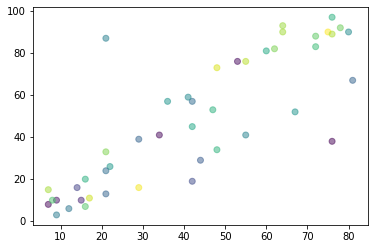

In [4]:
colors = np.random.rand(prestige.shape[0])
plt.scatter(prestige.income, prestige.prestige,  c=colors, alpha=0.5)
plt.show()

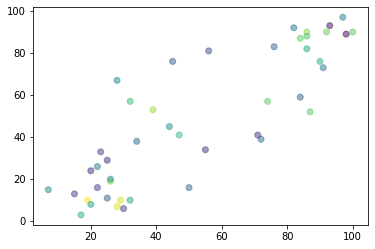

In [5]:
colors = np.random.rand(prestige.shape[0])
plt.scatter(prestige.education, prestige.prestige,  c=colors, alpha=0.5)
plt.show()

In [6]:
prestige_model = ols("prestige ~ income + education", data=prestige).fit()

In [7]:
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           8.65e-17
Time:                        19:16:06   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

In [8]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(prestige_model.resid)
lzip(name, test)

[('Jarque-Bera', 0.5195278349686449),
 ('Chi^2 two-tail prob.', 0.7712336390906134),
 ('Skew', 0.15493186779875415),
 ('Kurtosis', 3.4255184806149255)]

In [ ]:
#https://www.statsmodels.org/stable/examples/notebooks/generated/regression_diagnostics.html
#https://www.statsmodels.org/stable/examples/notebooks/generated/regression_plots.html

In [9]:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(prestige_model.resid)
lzip(name, test)

[('Chi^2', 1.2788071145675954), ('Two-tail probability', 0.5276070175778628)]

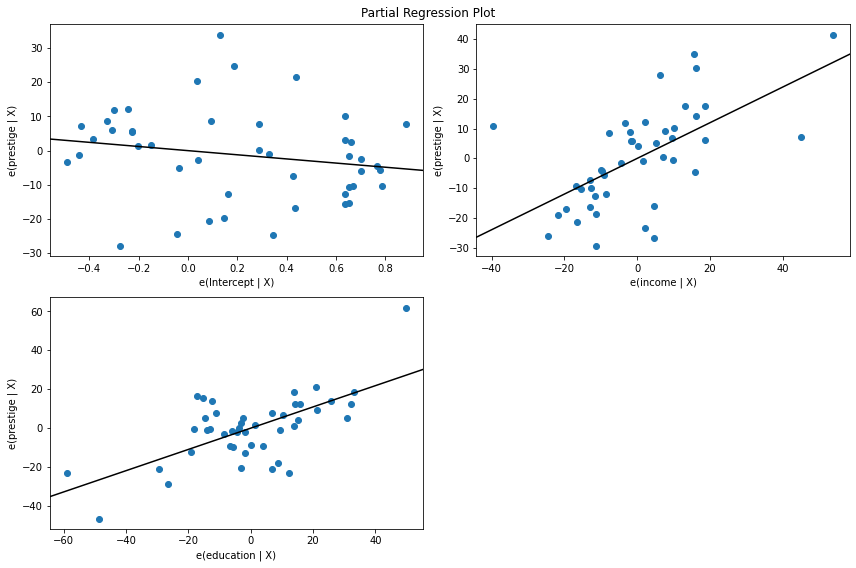

In [10]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(prestige_model, fig=fig)

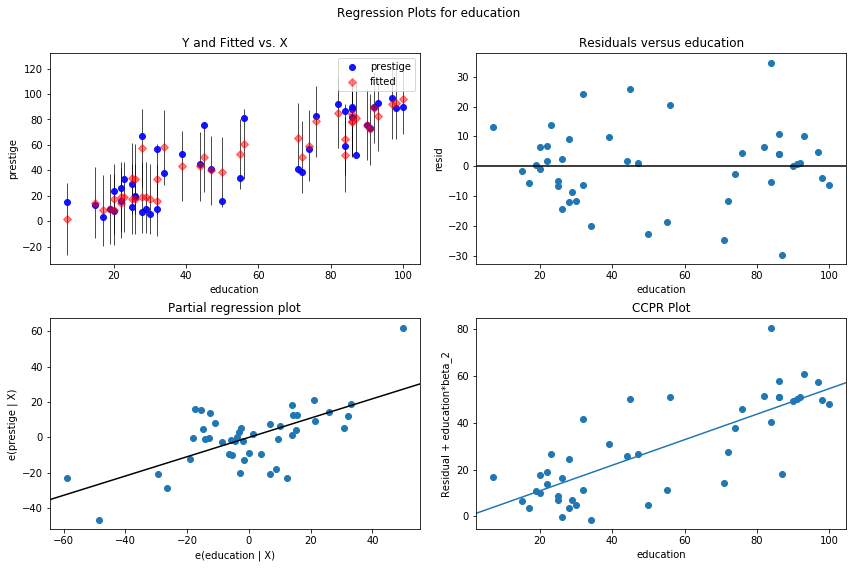

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(prestige_model, "education", fig=fig)